In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import signal as sig
import scipy 
from scipy import constants as con

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [171]:
altcrystal1_a4_Apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/altcrystal1_a4_Apm.csv")), delimiter =";")
salt_pvdf_trfe_a4_apm = np.genfromtxt((conv(x) for x in open("A4 Festkörper/salt+pvdf-trfe_a4_apm.CSV")), delimiter =";")
methan_A05_2ndtry = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan_A0.5_2ndtry.CSV")), delimiter =";")
methan1_std_A4 = np.genfromtxt((conv(x) for x in open("A4 Festkörper/methan1_std_A4.CSV")), delimiter =";")

Text(0.5, 1.0, 'Spektrum Methan')

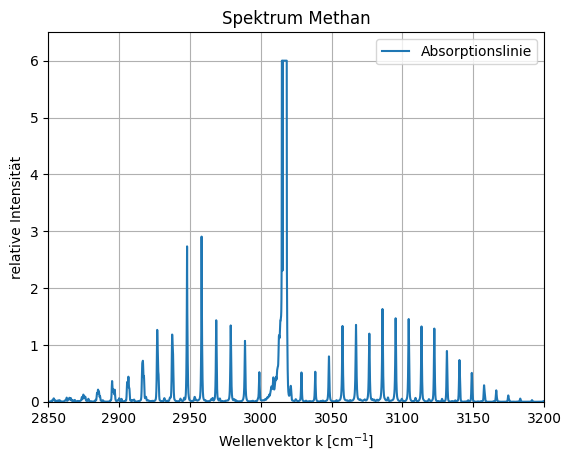

In [207]:
plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"Absorptionslinie")
plt.axis([2850,3200,0,6.5])
plt.xlabel(r"Wellenvektor k $[\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("newplots/methanspectrum-peaks.pdf")
plt.title("Spektrum Methan")

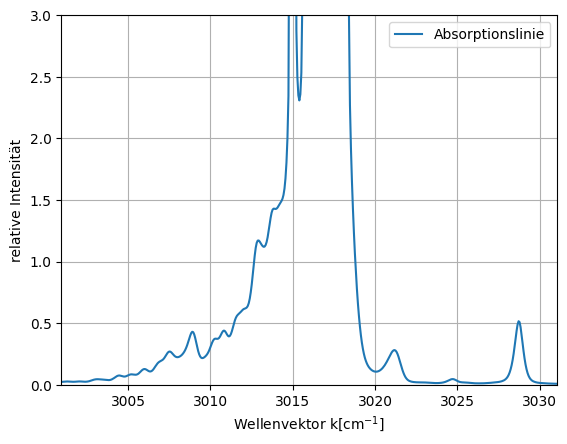

(37300.0, 37800.0, 0.0, 3.0)

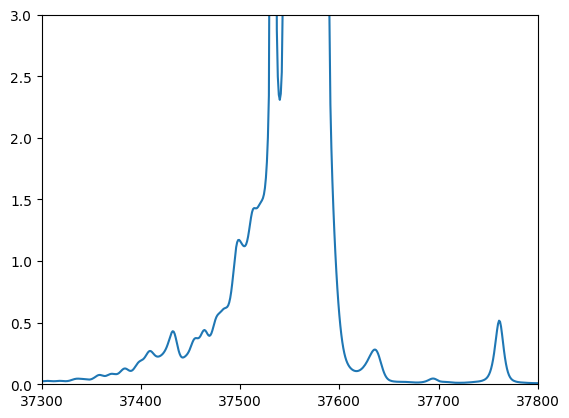

In [173]:
#plt.figure(figsize = [15,10])
#plt.plot(methan1_std_A4 [:,0],(methan1_std_A4 [:,1]) ,label= r"Absorptionslinie")

a = 37300
b= 37800

plt.plot(methan_A05_2ndtry [:,0],(methan_A05_2ndtry[:,1]) ,label= r"Absorptionslinie")
plt.axis([methan_A05_2ndtry[a,0],methan_A05_2ndtry[b,0],0,3])
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("plots/methanfull.pdf")
plt.show()

plt.plot((np.arange(0,len(methan_A05_2ndtry))),(methan_A05_2ndtry[:,1]),label="index")
plt.axis([a,b,0,3])

In [212]:
def gaus(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))

outerpeaks = []
peakerror = []

def peakstuff(mean,sigma,array1,d1,d2,a=1):
    x1a = np.asarray(array1[d1:d2,0])
    y1a = np.asarray(array1[d1:d2,1])
    
    #fit gaussian
    popt1,pcov1 = curve_fit(gaus,x1a,y1a,p0=[a,mean,sigma])

    #print(popt1[1],popt1[0])
    peakerror.append(popt1[0])
    outerpeaks.append(popt1[1])
    
    
#     plt.plot(x1a, gaus(x1a,*popt1), label='Gauß-Fit-Anfang 1')
#     plt.scatter(array1[:,0],array1[:,1],c="lightblue",s=2)
#     plt.xlabel(r"Wellenvektor k $[\mathrm{cm^{-1}}]$")
#     plt.ylabel("relative Intensität")
#     plt.xlim(array1[d1,0]-5,array1[d2,0]+5)
#     plt.show()

In [213]:
peakstuff(3008,2,methan_A05_2ndtry,37425,37440)
peakstuff(3021,2,methan_A05_2ndtry,37622,37648)

In [214]:
truemid = (3008.8840201189073 + 3021.091854067825)/2
print(truemid,truemid-3008.8840201189073)

3014.987937093366 6.103916974458571


In [215]:
mh = 1.673*10**(-27) 
mc = 1.99*10**(-26) 
mu  = (mh*4*mc)/(mh*4+mc)
kraftcon = (2 * np.pi * con.c * truemid*1/100)**2 *mu
ukraftcon = np.sqrt(((truemid-3008.8840201189073)*1/100)*(16*con.pi**2*con.c**2*mu*truemid)**2)
print(kraftcon,ukraftcon)



1.6152148802725886e-05 5.2943058684380236e-05


In [263]:
outerpeaks = []
peakerror = []

peakstuff(2948,3,methan_A05_2ndtry,36412,36433)
peakstuff(2960,3,methan_A05_2ndtry,36580,36605)
peakstuff(2969,3,methan_A05_2ndtry,36755,36773)
peakstuff(2978,3,methan_A05_2ndtry,36920,36948)
peakstuff(3048,5,methan_A05_2ndtry,38075,38095)
peakstuff(3057,3,methan_A05_2ndtry,38235,38250)
peakstuff(3066,3,methan_A05_2ndtry,38390,38410)
peakstuff(3075,3,methan_A05_2ndtry,38547,38565)
peakstuff(3084,3,methan_A05_2ndtry,38701,38720)
#print(outerpeaks,peakerror)

midval = np.mean(outerpeaks)

allerr = 0
for i in range(0,8):
    allerr += (1/8*peakerror[i])**2
miderr = np.sqrt(allerr)

print(midval,miderr)

3021.048564791079 0.5410845543663754


In [262]:
d= np.concatenate((np.diff(outerpeaks[0:4]),np.diff(outerpeaks[4:9])))

Berr = 0
for i in range(len(peakerror)):
    Berr += (peakerror[i]*0.5)**2
Berrges = np.sqrt(Berr)

for i in range(len(outerpeaks)):
    print(str(np.round(outerpeaks[i],2))+r"&"+str(np.round(peakerror[i],2))+r"\\")

B = (sum(d)/len(d))/2

R = np.sqrt((con.hbar**2)/(con.h*con.c*16/3*mh*B))
Rerr = np.sqrt((Berr*(-(np.sqrt(3)*np.abs(con.hbar))/(8*con.c*con.h*mh*B**2*np.sqrt((1)/(con.c*con.h*mh*B)))))**2)

I = 8/3*mh*R**2
Ierr = np.sqrt((Rerr*(16/3*mh*R))**2)

print("Roationskonstante B= "+str(np.round(B,2))+" \pm "+str(np.round(Berr,2)))
print("Bindungsabstand R= "+str(np.round(R,11))+" \pm "+str(np.round(Rerr,12)))
print("Trägheitsmoment I= "+str(np.round(I,47))+" \pm "+str(np.round(Ierr,47)))

2948.03&2.28\\
2958.31&2.28\\
2968.61&1.34\\
2978.84&1.21\\
3048.16&0.76\\
3057.71&1.27\\
3067.23&1.26\\
3076.62&1.13\\
3085.93&1.5\\
Roationskonstante B= 4.9 \pm 5.25
Bindungsabstand R= 1.13e-09 \pm 6.06e-10
Trägheitsmoment I= 5.71e-45 \pm 6.12e-45


In [255]:
testk = (2*(con.h*con.c*Berr*1/100))/(R**2)
print(testk)

1.6272591806596972e-08


In [185]:
peaks = sig.find_peaks(methan_A05_2ndtry[:,1],height=1,distance=75, threshold=0.005)
peakpos = peaks[0]
peakheight = peaks[1]['peak_heights']
d=[]
d.append(methan_A05_2ndtry[36592,0] - methan_A05_2ndtry[364220,0])
d.append(methan_A05_2ndtry[36763,0] - methan_A05_2ndtry[36592,0])
d.append(methan_A05_2ndtry[36933,0] - methan_A05_2ndtry[36763,0])
d.append(methan_A05_2ndtry[37100,0] - methan_A05_2ndtry[36933,0])
d.append(methan_A05_2ndtry[38400,0] - methan_A05_2ndtry[38242,0])
d.append(methan_A05_2ndtry[38556,0] - methan_A05_2ndtry[38400,0])
d.append(methan_A05_2ndtry[38710,0] - methan_A05_2ndtry[38556,0])
d.append(methan_A05_2ndtry[38864,0] - methan_A05_2ndtry[38710,0])
d.append(methan_A05_2ndtry[39017,0] - methan_A05_2ndtry[38864,0])
d.append(methan_A05_2ndtry[39167,0] - methan_A05_2ndtry[39017,0])
d.append(methan_A05_2ndtry[39317,0] - methan_A05_2ndtry[39167,0])
B = sum(d)/len(d)
print("B=:"+str(B/2))

planck = 6.62607015*10**(-34)
sol = 299792458

IndexError: index 364220 is out of bounds for axis 0 with size 44070

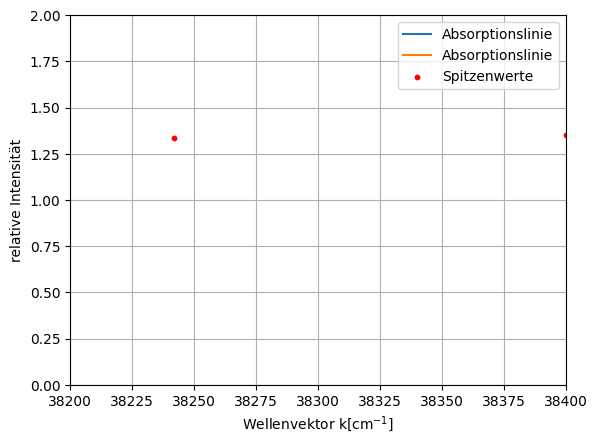

In [187]:
xax = np.arange(0,len(methan_A05_2ndtry))
plt.plot(methan_A05_2ndtry, methan_A05_2ndtry[:,1],label="Absorptionslinie")
plt.scatter(peakpos,peakheight,label="Spitzenwerte", color ="red",s=10)
plt.axis([38200,38400,0,2])
plt.xlabel(r"Wellenvektor k$ [\mathrm{cm}^{-1}]$")
plt.ylabel("relative Intensität")
plt.legend(loc = 0)
plt.grid(True)
plt.savefig("plots/methanpeaks.pdf")